In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [3]:
cust_ac_df = pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 2 - Credit Card Case Study/Customer Acqusition.csv").drop(columns='No')
cust_ac_df.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [4]:
repay_df = pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 2 - Credit Card Case Study/Repayment.csv").drop(columns=['Unnamed: 4','SL No:'])
repay_df.head(2)


,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [5]:
spend_df = pd.read_csv(r"C:\Users\kmaye\Downloads\python case study\Case Study 2 - Credit Card Case Study/spend.csv").drop(columns='Sl No:')
spend_df.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [6]:
## a. In case age is less than 18, replace it with the mean of age values.
cust_ac_df["Age"]=np.where(cust_ac_df['Age']<18,cust_ac_df['Age'].mean(),cust_ac_df['Age'])

In [7]:
merged_spend_df=pd.merge(cust_ac_df,spend_df,on='Customer',how='left').rename(columns={'Amount':'Spend_amount'})
merged_spend_df


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


In [8]:
merged_repay_df=pd.merge(cust_ac_df,repay_df,on='Customer',how='left').rename(columns={'Amount':'Repay_amount'})
merged_repay_df

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,310992.30
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,121874.90
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,337815.57
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,25682.73


In [9]:
## b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
merged_spend_df['Spend_amount'] = np.where(merged_spend_df['Spend_amount'] > merged_spend_df['Limit'], 0.5 * merged_spend_df['Limit'], merged_spend_df['Spend_amount'])
merged_spend_df

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00


In [10]:
## c. In case the repayment amount is more than the limit, replace the repayment with the limit.
merged_repay_df['Repay_amount'] = np.where(merged_repay_df['Repay_amount'] > merged_repay_df['Limit'], merged_repay_df['Limit'], merged_repay_df['Repay_amount'])
merged_repay_df

,Customer,Age,City,Product,Limit,Company,Segment,Month,Repay_amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,495414.75
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,245899.02
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,259490.06
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,437555.12
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,100000.00
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,10000.00
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,10001.00
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,10002.00


In [11]:
merged_repay_df['Repay_amount'].mean()

163321.57339333332

In [12]:
## a. How many distinct customers exist?
distinct_customers_count = spend_df['Customer'].nunique()
print(f"unique customers: {distinct_customers_count}")

unique customers: 100


In [13]:
## b. How many distinct categories exist?
distinct_categories_count = spend_df['Type'].nunique()
print(f"Number of distinct categories: {distinct_categories_count}")

Number of distinct categories: 15


In [14]:
merged_spend_df['Month'] = pd.to_datetime(merged_spend_df['Month'])
merged_spend_df['MonthYear'] = merged_spend_df['Month'].dt.to_period('M')

In [15]:
## c. What is the average monthly spend by customers?
average_monthly_spend = merged_spend_df.groupby('MonthYear')['Spend_amount'].mean()
print(f"Average monthly spend by customers:\n{average_monthly_spend}")

Average monthly spend by customers:
MonthYear
2004-01    144233.915179
2004-02    136998.280000
2004-03    133708.090714
2004-04    124621.976429
2004-05    153326.954286
2004-09    171579.263571
2004-11     79642.078571
2005-01    192271.670714
2005-02    154334.423869
2005-04    146430.918929
2005-05    154625.803000
2005-06    190726.475714
2005-07    120803.091429
2005-08    141707.435357
2005-09    109423.776429
2005-10     89879.421429
2005-11    178120.211667
2005-12     84416.000000
2006-01    136312.515714
2006-02    148478.986905
2006-03    131720.289032
2006-04    134743.702447
2006-05    143693.687143
2006-06    155971.498571
2006-07    189088.681071
2006-08    213863.917857
2006-09    142392.073571
2006-10    172156.287143
2006-11    144283.947143
2006-12    150129.360714
Freq: M, Name: Spend_amount, dtype: float64


In [16]:
merged_repay_df['Month'] = pd.to_datetime(merged_repay_df['Month'])
merged_repay_df['MonthYear'] = merged_repay_df['Month'].dt.to_period('M')

In [17]:
## d. What is the average monthly repayment by customers?
average_monthly_repayment = merged_repay_df.groupby('MonthYear')['Repay_amount'].mean()
print(f"d. Average monthly repayment by customers:\n{average_monthly_repayment}")

d. Average monthly repayment by customers:
MonthYear
2004-01    159971.502571
2004-02    125612.505556
2004-03    177767.948000
2004-04    175632.658000
2004-05    151310.396400
2004-09    118926.025625
2004-11    119226.575333
2005-01    181260.750000
2005-02    157356.791358
2005-04    121163.452000
2005-05    200121.848636
2005-06     97052.375833
2005-07    149944.928333
2005-08    149984.104865
2005-09     73559.961667
2005-10    136268.268333
2005-11    169225.884048
2005-12    179119.050833
2006-01    204422.038333
2006-02    188198.167436
2006-03    154861.950196
2006-04    180529.321556
2006-05    171270.320230
2006-06    165429.070000
2006-07    170152.780811
2006-08    161553.497500
2006-09    199024.565833
2006-10    203969.589167
2006-11    145565.170370
2006-12    201158.939167
Freq: M, Name: Repay_amount, dtype: float64


In [18]:
## e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
monthly_spend = merged_spend_df.groupby('MonthYear')['Spend_amount'].sum()
monthly_repay = merged_repay_df.groupby('MonthYear')['Repay_amount'].sum()

# Calculate the total profit for each month
Amount_remaining = monthly_repay - monthly_spend

# Calculate the profit for the bank including interest
monthly_interest_rate = 0.029  # 2.9% monthly interest rate
monthly_profit = Amount_remaining[ Amount_remaining> 0]*monthly_interest_rate

print(monthly_profit)

MonthYear
2004-01     14854.05404
2004-03     23043.57255
2004-04     51607.36760
2004-05     47449.29395
2004-11     19528.87637
2005-05    265963.41583
2005-07      3134.77994
2005-08     45866.50701
2005-10     10930.31228
2005-12     28060.53369
2006-01     15795.98796
2006-02     32004.72132
2006-03     87247.51848
2006-04    103870.19639
2006-05    198756.47002
2006-07     29033.92478
2006-09     11449.36704
2006-10      1085.96445
2006-12      9050.79038
Freq: M, dtype: float64


In [19]:
## f. What are the top 5 product types?
top_5_product_types = spend_df['Type'].value_counts().nlargest(5)
print(f"Top 5 product types:\n{top_5_product_types}")

Top 5 product types:
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64


In [20]:
## g. Which city is having the maximum spend?
max_spend_city = merged_spend_df.groupby('City')['Spend_amount'].sum().idxmax()
print(f"City with maximum spend: {max_spend_city}")

City with maximum spend: COCHIN


In [21]:
## h. Which age group is spending more money?
age_bins = [18, 25, 35, 50, 100]  
age_labels = ['18-24', '25-34', '35-49', '50+']
merged_spend_df['AgeGroup'] = pd.cut(merged_spend_df['Age'], bins=age_bins, labels=age_labels)
top_age_group = merged_spend_df.groupby('AgeGroup')['Spend_amount'].sum().idxmax()
print(f"Age group spending more : {top_age_group}")

Age group spending more : 35-49


In [22]:
##i. Who are the top 10 customers in terms of repayment

top_10_customers_repayment = merged_repay_df.groupby('Customer')['Repay_amount'].sum().nlargest(10)
print(f"Top 10 customers in terms of repayment:\n{top_10_customers_repayment}")

Top 10 customers in terms of repayment:
Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A43     8489871.46
A45     8448334.87
A12     8334760.16
A14     7943268.63
A44     7744730.12
A39     7622483.30
A42     7615460.86
Name: Repay_amount, dtype: float64


Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612

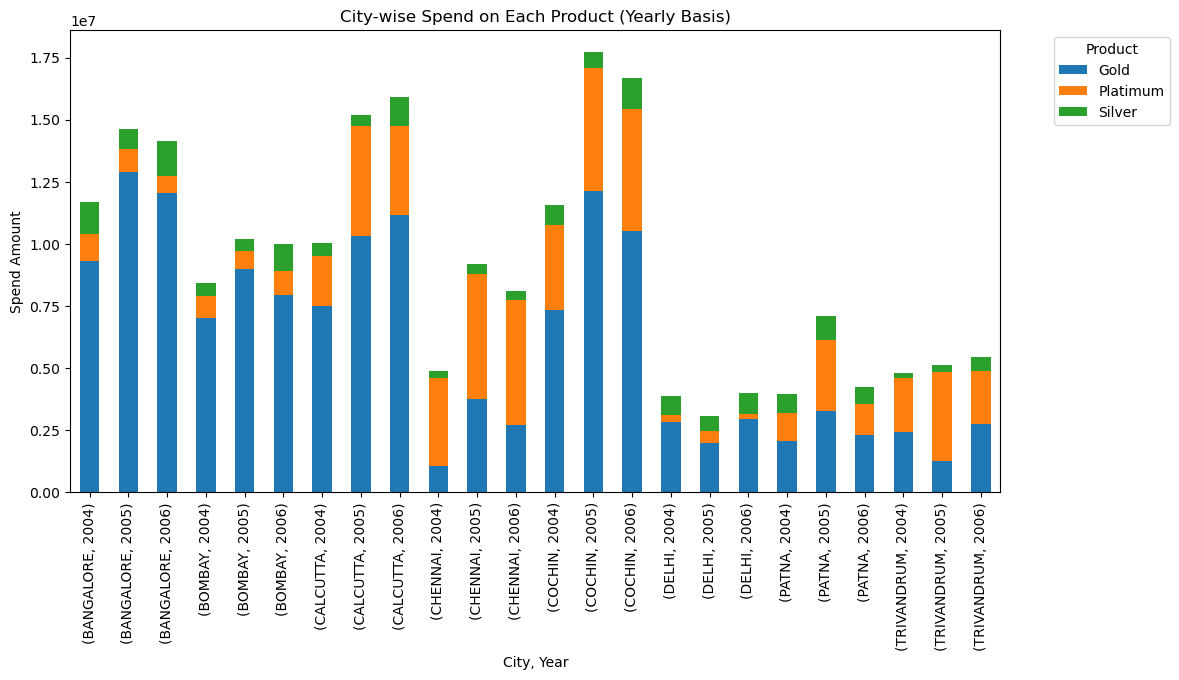

In [23]:
## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same
merged_spend_df['Year'] = pd.to_datetime(merged_spend_df['Month']).dt.year
city_product_yearly_spend=merged_spend_df.groupby(['City','Product','Year'])['Spend_amount'].sum().unstack('Product')
print(city_product_yearly_spend)

city_product_yearly_spend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('City-wise Spend on Each Product (Yearly Basis)')
plt.xlabel('City, Year')
plt.ylabel('Spend Amount')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

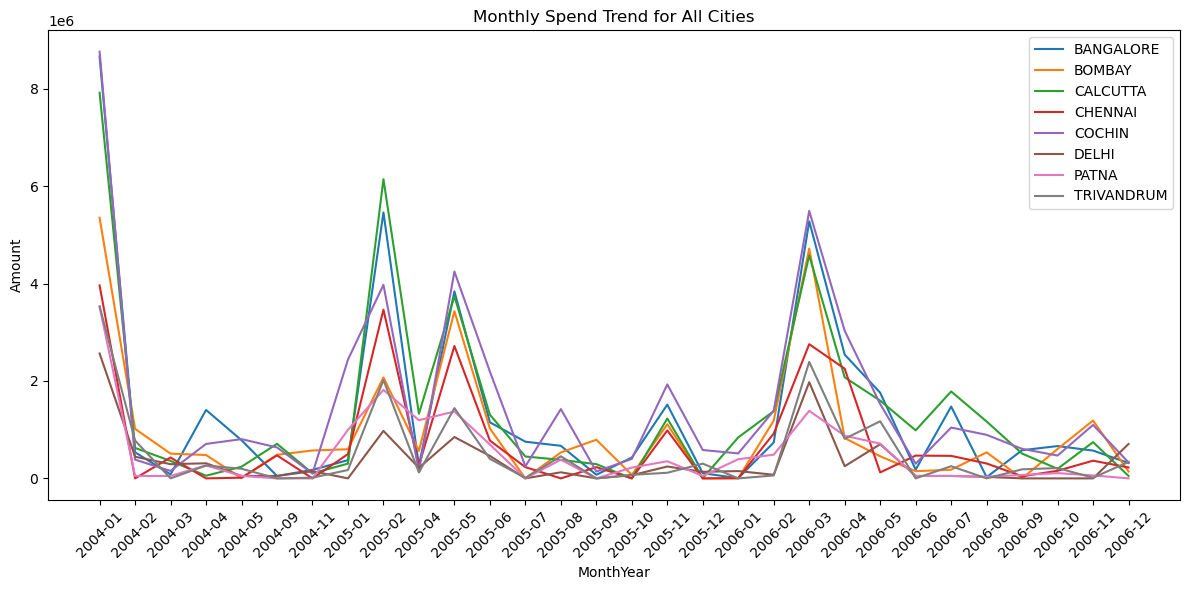

In [26]:
## Monthly comparison of total spends, city wise
monthly_spend=merged_spend_df.groupby(['City','MonthYear'])['Spend_amount'].sum().reset_index()
pivot_data = monthly_spend.pivot_table(index='MonthYear', columns='City', values='Spend_amount',fill_value=0)


pivot_data.index = pivot_data.index.astype(str)

# getting unique cities
cities = pivot_data.columns
# Plotting
plt.figure(figsize=(12, 6))
for city in cities:                                                        
    plt.plot(pivot_data.index, pivot_data[city], label=city)

plt.xlabel('MonthYear')
plt.ylabel('Amount')
plt.title('Monthly Spend Trend for All Cities')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


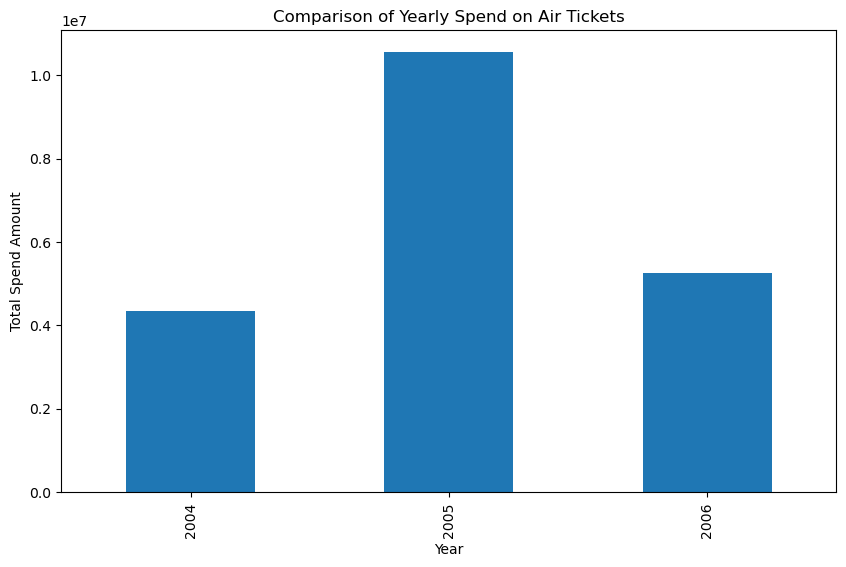

In [24]:
## Comparison of yearly spend on air tickets

spend_df['Year'] = pd.to_datetime(merged_spend_df['Month']).dt.year

air_tickets_spend = merged_spend_df[merged_spend_df['Type'] == 'AIR TICKET']


yearly_air_tickets_spend = air_tickets_spend.groupby('Year')['Spend_amount'].sum()

yearly_air_tickets_spend.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Total Spend Amount')
plt.show()

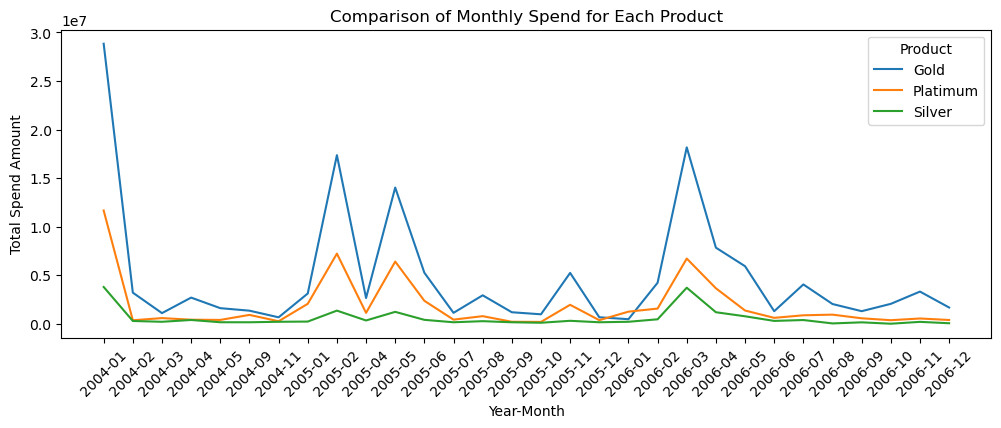

In [25]:
##c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
monthly_spend_on_product=merged_spend_df.groupby(['Product','MonthYear'])['Spend_amount'].sum().reset_index()
pivot_table = monthly_spend_on_product.pivot_table(index='MonthYear', columns='Product', values='Spend_amount',fill_value=0)

product=pivot_table.columns
plt.figure(figsize=(12,4))
for p in product:
    plt.plot(pivot_table.index.astype(str),pivot_table[p],label=p)
plt.xticks(rotation=45)
plt.title('Comparison of Monthly Spend for Each Product')
plt.xlabel('Year-Month')
plt.ylabel('Total Spend Amount')
plt.legend(title='Product')
plt.show()

In [28]:
merged_repay_df['Year'] = pd.to_datetime(merged_repay_df['Month']).dt.year

In [51]:
def top_10_customers_by_repayment(merged_repay_df, product_type, time_period):
    # Filter DataFrame based on product type
    df = merged_repay_df[merged_repay_df['Product'] == product_type]

    # Group by city, customer, and time period (yearly or monthly) and sum the repayment amounts
    if time_period == 'yearly':
        group_cols = ['City', 'Customer', 'Year']
    elif time_period == 'monthly':
        group_cols = ['City', 'Customer', 'MonthYear']
    else:
        raise ValueError("Invalid time_period. Please choose 'yearly' or 'monthly'.")

    grouped_df = df.groupby(group_cols)['Repay_amount'].sum().reset_index()

    # Get top 10 customers for each city
    top_10_customers = grouped_df.groupby('City').apply(lambda x: x.nlargest(10, 'Repay_amount')).reset_index(drop=True)

    return top_10_customers

# Example usage
product_type = 'Gold'
time_period = 'yearly'
top_customers = top_10_customers_by_repayment(merged_repay_df, product_type, time_period)
print(top_customers.sort_values(by=['City','Year','Repay_amount']))


          City Customer  Year  Repay_amount
9    BANGALORE       A1  2004    2359797.84
3    BANGALORE      A14  2004    2770261.30
7    BANGALORE      A14  2005    2491981.61
5    BANGALORE      A30  2005    2667746.38
1    BANGALORE      A13  2005    3757673.00
0    BANGALORE      A43  2005    4006956.60
8    BANGALORE      A30  2006    2486958.41
6    BANGALORE      A43  2006    2576417.39
4    BANGALORE      A14  2006    2681025.72
2    BANGALORE      A13  2006    3477314.89
16      BOMBAY      A62  2004    1744114.25
15      BOMBAY      A12  2004    2339080.90
13      BOMBAY      A42  2004    3045914.71
18      BOMBAY      A62  2005    1541617.21
14      BOMBAY      A12  2005    2877588.30
11      BOMBAY      A42  2005    3125758.43
19      BOMBAY      A42  2006    1443787.72
17      BOMBAY      A62  2006    1684085.69
12      BOMBAY      A12  2006    3118090.96
10      BOMBAY      A17  2006    3127783.14
23    CALCUTTA      A60  2004    2890721.81
29    CALCUTTA      A31  2005   